In [1]:
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
station = "Hot"

In [3]:
data = xr.load_dataset(f"../data/1_products/{station}_obs.zarr", engine="zarr")
data

<xarray.Dataset> Size: 13kB
Dimensions:    (time: 546, latitude: 1, longitude: 1, layer: 1)
Coordinates:
  * latitude   (latitude) float64 8B 22.75
  * layer      (layer) int64 8B 0
  * longitude  (longitude) int64 8B -158
  * time       (time) datetime64[ns] 4kB 1994-02-17 1994-02-18 ... 2022-09-02
Data variables:
    day        (time, latitude, longitude, layer) float64 4kB 0.4208 ... 3.491
    night      (time, latitude, longitude, layer) float64 4kB 1.48 ... 2.564
Attributes:
    creation date:  2025-03-31T16:35:10.316525
    layer:          epipelagic
    station:        Hot

# Remove outliers


In [4]:
q1 = data.quantile(0.25, dim="time")
q3 = data.quantile(0.75, dim="time")
iqr = q3 - q1

In [5]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [6]:
new_data = data.where((data > lower_bound) & (data < upper_bound))

# Remove observations when day > night


In [7]:
# to_remove = new_data["day"].where(new_data["day"] > new_data["night"]).dropna("time").time
# new_data = new_data.drop_sel(time=to_remove)
# to_remove.to_series()

## DAY


Text(0.5, 1.0, 'Day observations')

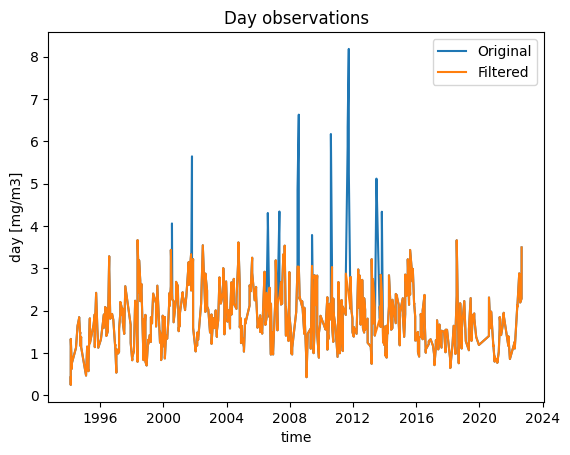

In [8]:
data.day.dropna("time").plot(label="Original")
new_data.day.dropna("time").plot(label="Filtered")
plt.legend()
plt.title("Day observations")

## NIGHT


Text(0.5, 1.0, 'Night observations')

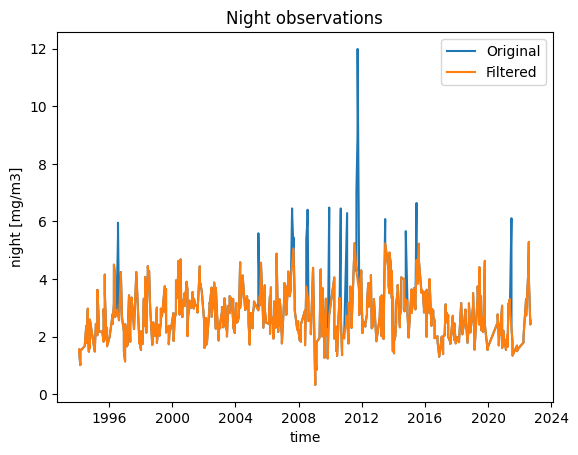

In [9]:
data.night.dropna("time").plot(label="Original")
new_data.night.dropna("time").plot(label="Filtered")
plt.legend()
plt.title("Night observations")

# Export


In [10]:
new_data.to_zarr(f"../data/1_products/{station}_obs_filtered.zarr", mode="w")